   ##                                            Image Difference with OpenCV and Python
In order to compute the difference between two images we’ll be utilizing the Structural Similarity Index, first introduced by Wang et al. in their 2004 paper, Image Quality Assessment: From Error Visibility to Structural Similarity. This method is already implemented in the scikit-image library for image processing.

The trick is to learn how we can determine exactly where, in terms of (x, y)-coordinate location, the image differences are.

To accomplish this, we’ll first need to make sure our system has Python, OpenCV, scikit-image, and imutils.

You can learn how to configure and install Python and OpenCV on your system using one of my OpenCV install tutorials.

If you don’t already have scikit-image  installed/upgraded, upgrade via:

In [1]:
# pip install --upgrade scikit-image

In [2]:
# pip install --upgrade imutils

In [3]:
# Install above packages first time. Now that our system is ready with the prerequisites, let’s continue.

In [4]:
# Python, OpenCV, scikit-image, and imutils  are needed for this exercise

## Computing image difference
Can you spot the difference between these two images?

https://www.pyimagesearch.com/2017/06/19/image-difference-with-opencv-and-python/

If you take a second to study the two credit cards, you’ll notice that the MasterCard logo is present on the left image but has been Photoshopped out from the right image.

You may have noticed this difference immediately, or it may have taken you a few seconds. Either way, this demonstrates an important aspect of comparing image differences — sometimes image differences are subtle — so subtle that the naked eye struggles to immediately comprehend the difference (we’ll see an example of such an image later in this blog post).

So why is computing image differences so important?

One example is phishing. Attackers can manipulate images ever-so-slightly to trick unsuspecting users who don’t validate the URL into thinking they are logging into their banking website — only to later find out that it was a scam.

In [5]:
# import the necessary packages
import os
from skimage.measure import compare_ssim
import argparse
import imutils
import numpy as np
import cv2

os.getcwd()

'C:\\Users\\Eshwar'

Lines 2-5 show our imports. We’ll be using compare_ssim  (from scikit-image), argparse , imutils , and cv2  (OpenCV).

We establish two command line arguments, --first  and --second , which are the paths to the two respective input images we wish to compare (Lines 8-13).

Next we’ll load each image from disk and convert them to grayscale:

In [6]:
from matplotlib import pyplot as plt

## Thresholding
Thresholding is the simplest method of image segmentation. It is a non-linear operation that converts a gray-scale image into a binary image where the two levels are assigned to pixels that are below or above the specified threshold value. In other words, if pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). In OpenCV, we use cv2.threshold() function:

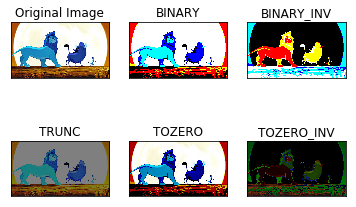

In [7]:
# load the two input images
imageA = cv2.imread('image1.jpg',1)
imageB = cv2.imread('image2.jpg',1)


ret,thresh1 = cv2.threshold(imageA,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(imageA,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(imageA,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(imageA,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(imageA,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [imageA, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

### Display an image
Use the function cv2.imshow() to display an image in a window. The window automatically fits to the image size.

First argument is a window name which is a string. second argument is our image. You can create as many windows as you wish, but with different window names.

In [8]:
# Warning Even if the image path is wrong, it won’t throw any error, but print img will give you None# 

cv2.imshow('image',imageA)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
cv2.imshow('image',imageB)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
print(imageA.shape)
print(imageB.shape)

(439, 780, 3)
(439, 780, 3)


In [11]:
# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

In [12]:
#Next, let’s compute the Structural Similarity Index (SSIM) between our two grayscale images.

In [13]:
# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.9856706794500735


Using the compare_ssim  function from scikit-image, we calculate a score  and difference image, diff  (Line 25).

The score  represents the structural similarity index between the two input images. This value can fall into the range [-1, 1] with a value of one being a “perfect match”.

The diff  image contains the actual image differences between the two input images that we wish to visualize. The difference image is currently represented as a floating point data type in the range [0, 1] so we first convert the array to 8-bit unsigned integers in the range [0, 255] (Line 26) before we can further process it using OpenCV.

Now, let’s find the contours so that we can place rectangles around the regions identified as “different”:

In [14]:
# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [15]:
# loop over the contours
for c in cnts:
	# compute the bounding box of the contour and then draw the
	# bounding box on both input images to represent where the two
	# images differ
	(x, y, w, h) = cv2.boundingRect(c)
	cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
	cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)
 
# show the output images
cv2.imshow("Original", imageA)
cv2.imshow("Modified", imageB)
cv2.imshow("Diff", diff)
cv2.imshow("Thresh", thresh)
cv2.waitKey(0)

-1

In [16]:
print(cv2.__version__)

3.4.1


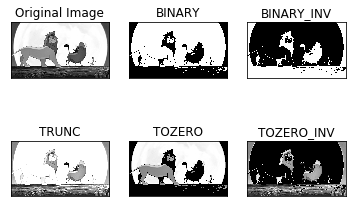

In [19]:
# https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Global_Thresholding_Adaptive_Thresholding_Otsus_Binarization_Segmentations.php

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('image1.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()